In [1]:
%pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
import numpy as np
from src.preprocessing import process_dataset
sys.path.append("src")

import preprocessing

In [2]:
!ls

README.md	     data	    notebooks	      src
baseline_demo.ipynb  filestructure  requirements.txt


In [3]:
# Dataset label display
from src.preprocessing import process_dataset
import numpy as np

all_X, all_y = [], []

for d in ["data/training-a/", "data/training-b/", "data/training-c/", "data/training-d/", "data/training-e/", "data/training-f/"]:
    X, y = process_dataset(d)
    all_X.append(X)
    all_y.append(y)

X = np.vstack(all_X)
y = np.hstack(all_y)

print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)
print("Unique labels:", np.unique(y, return_counts=True))


=== Using FINAL process_dataset (with .hea labels) ===
=== Using FINAL process_dataset (with .hea labels) ===
=== Using FINAL process_dataset (with .hea labels) ===
=== Using FINAL process_dataset (with .hea labels) ===
=== Using FINAL process_dataset (with .hea labels) ===
=== Using FINAL process_dataset (with .hea labels) ===
Feature matrix shape: (3240, 4)
Labels shape: (3240,)
Unique labels: (array([0, 1]), array([2575,  665]))


In [4]:
# Install imbalanced-learn inside notebook
%pip install -q imbalanced-learn

import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Assume X, y already ban gaye hain preprocessing se
print("Original class distribution:", np.unique(y, return_counts=True))

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before resampling:")
print("Train:", np.unique(y_train, return_counts=True))
print("Test :", np.unique(y_test, return_counts=True))

# Oversampling (only on training set)
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print("\nAfter resampling (train set):")
print("Train:", np.unique(y_train_res, return_counts=True))
print("Test :", np.unique(y_test, return_counts=True))


Note: you may need to restart the kernel to use updated packages.
Original class distribution: (array([0, 1]), array([2575,  665]))
Before resampling:
Train: (array([0, 1]), array([2060,  532]))
Test : (array([0, 1]), array([515, 133]))

After resampling (train set):
Train: (array([0, 1]), array([2060, 2060]))
Test : (array([0, 1]), array([515, 133]))


In [2]:
from src.segmentation import run_segmentation
from src.preprocessing import load_wav

fs, audio = load_wav("data/training-a/a0001.wav")
states = run_segmentation(audio, fs)
print(states[:100])


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


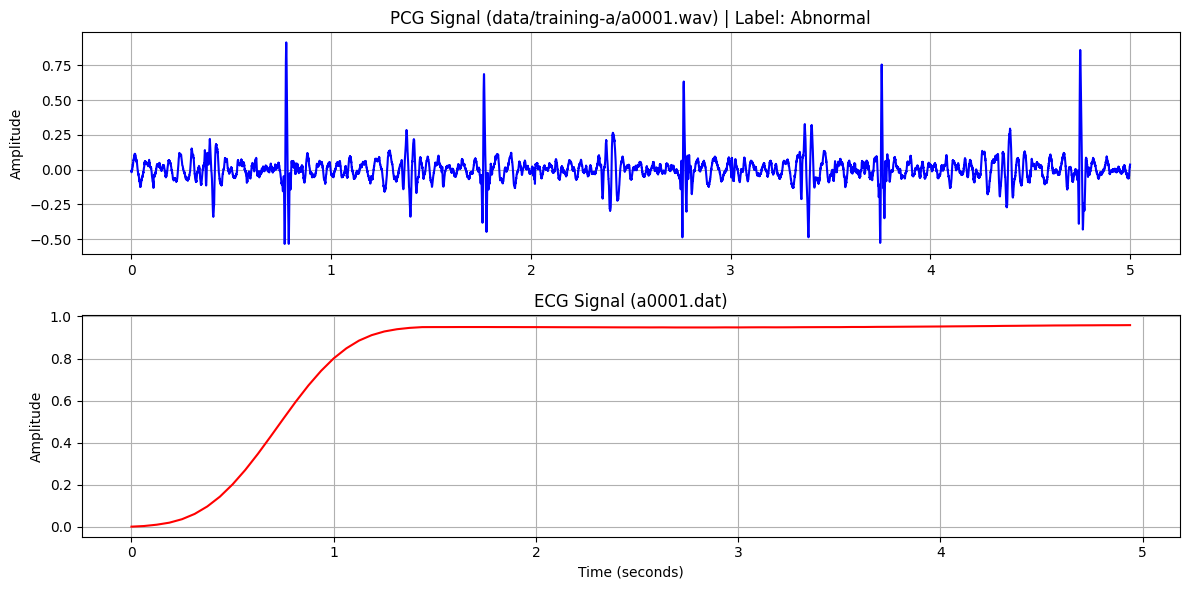

In [3]:
from src.visualization import visualize_pcg_ecg

visualize_pcg_ecg("data/training-a/a0001.wav", "data/training-a/a0001.hea", duration=5)
